In [1]:
!pip install missingno


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
import pandas as pd
import os

# Define the path to the desktop folder
desktop_path = os.path.expanduser("/Users/otto/GitHub repos/AML/MALL/Mall_Customers.csv")

# Load the dataset
customer_df = pd.read_csv(desktop_path)

# Display the first few rows of the dataset
print(customer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
customer_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
customer_dtype = customer_df.dtypes
customer_dtype.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [9]:
customer_df.isnull().sum().sort_values(ascending = False).head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

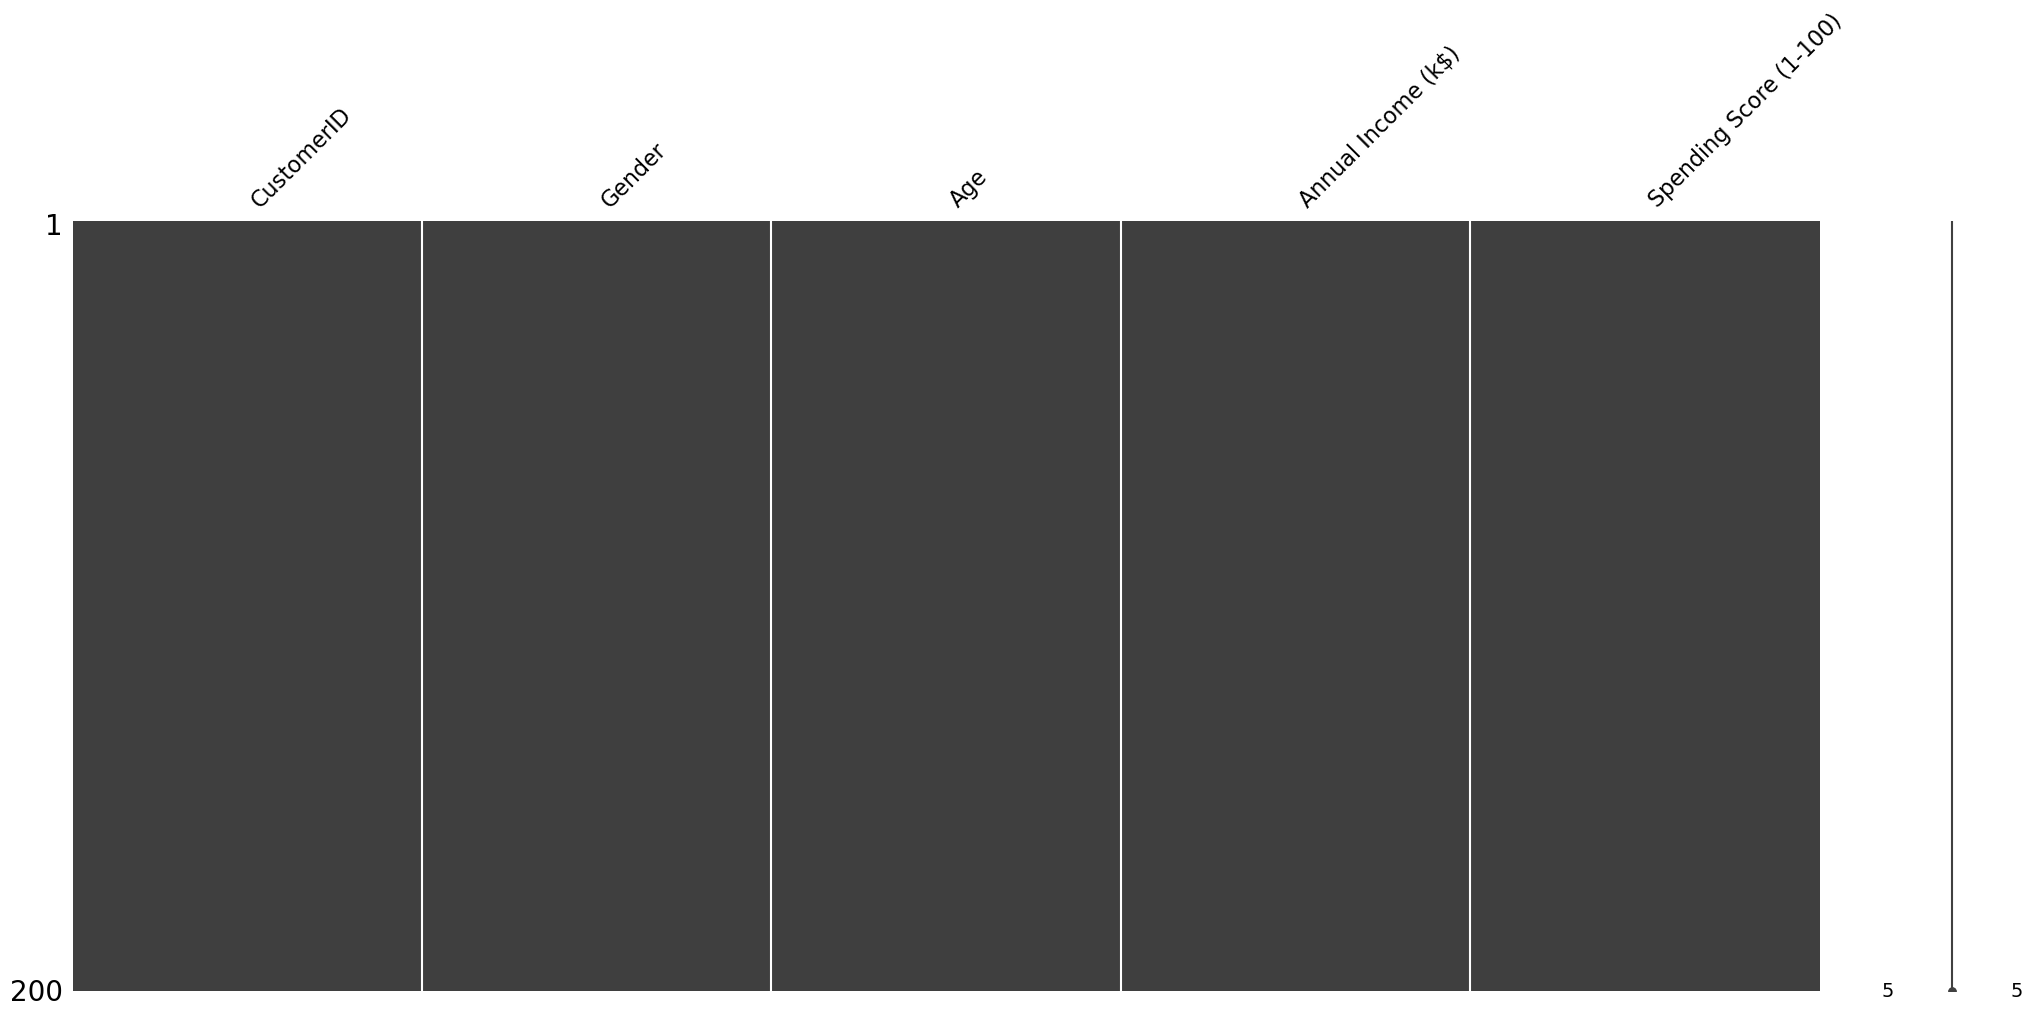

In [11]:
msno.matrix(customer_df)

In [10]:
numerical_features = [col for col in customer_df.columns if customer_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(customer_df[col].unique()) < 10 and col not in ['CustomerID']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['CustomerID']]
categorical_features = [col for col in customer_df.columns if customer_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of categorical features : ",len(categorical_features))

Total Number of Numerical Columns :  4
Number of discrete features :  0
No of continuous features are :  3
Number of categorical features :  1


/var/folders/5v/rt_yzy0j3jxbz2v6rq5qcybh0000gn/T/ipykernel_3849/878009939.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=customer_df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]
/var/folders/5v/rt_yzy0j3jxbz2v6rq5qcybh0000gn/T/ipykernel_3849/878009939.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=customer_df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]
/var/folders/5v/rt_yzy0j3jxbz2v6rq5qcybh0000gn/T/ipykernel_3849/878009939.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=customer_df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]


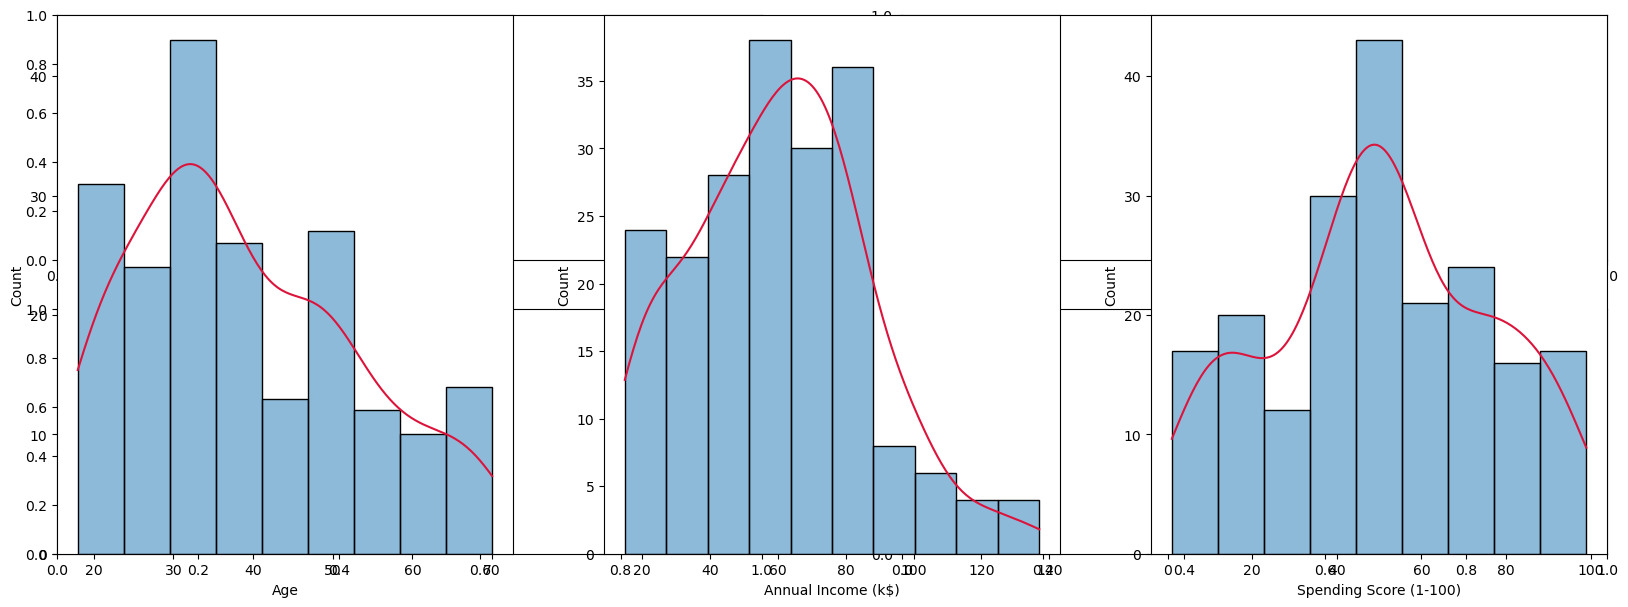

In [11]:
f, axes = plt.subplots(2,2 , figsize=(20, 7), sharex=False)
pos = 1
for i, feature in enumerate(continuous_features):

  plt.subplot(1 , 3 , pos)
  ax = sns.histplot(data=customer_df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]
  ax.lines[0].set_color('crimson')
  pos = pos + 1

In [12]:
# get the features except object types
numeric_feats = customer_df.dtypes[customer_df.dtypes != 'object'].index

# check the skew of all numerical features
skewed_feats = customer_df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))


 Skew in numberical features: 

                            Skew
Age                     0.481919
Annual Income (k$)      0.319424
CustomerID              0.000000
Spending Score (1-100) -0.046865


/var/folders/5v/rt_yzy0j3jxbz2v6rq5qcybh0000gn/T/ipykernel_3849/2150657527.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=customer_df, palette="Set3")


<Axes: xlabel='Gender', ylabel='count'>

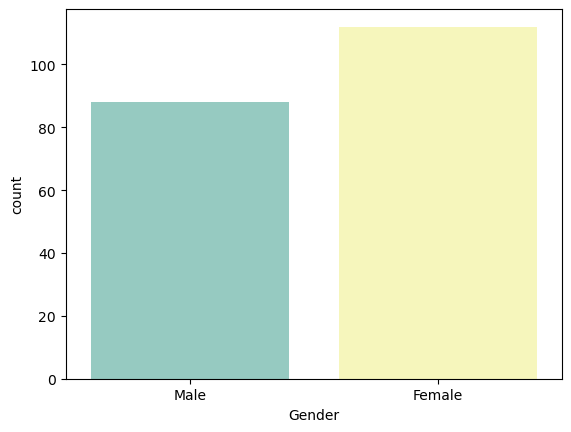

In [13]:
sns.countplot(x='Gender', data=customer_df, palette="Set3")

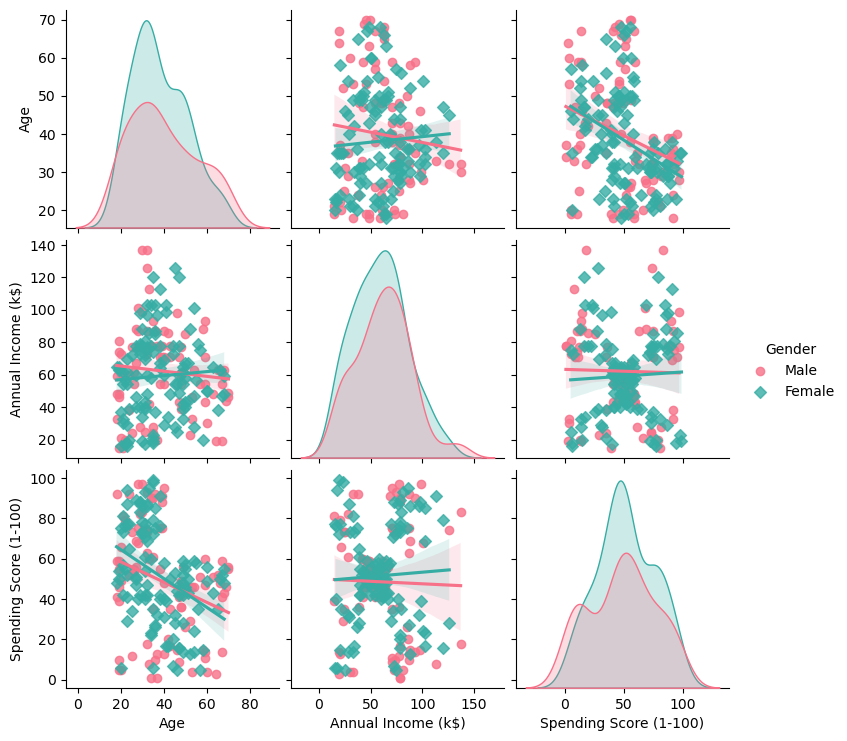

In [14]:
#Pairplot 
sns.pairplot(customer_df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

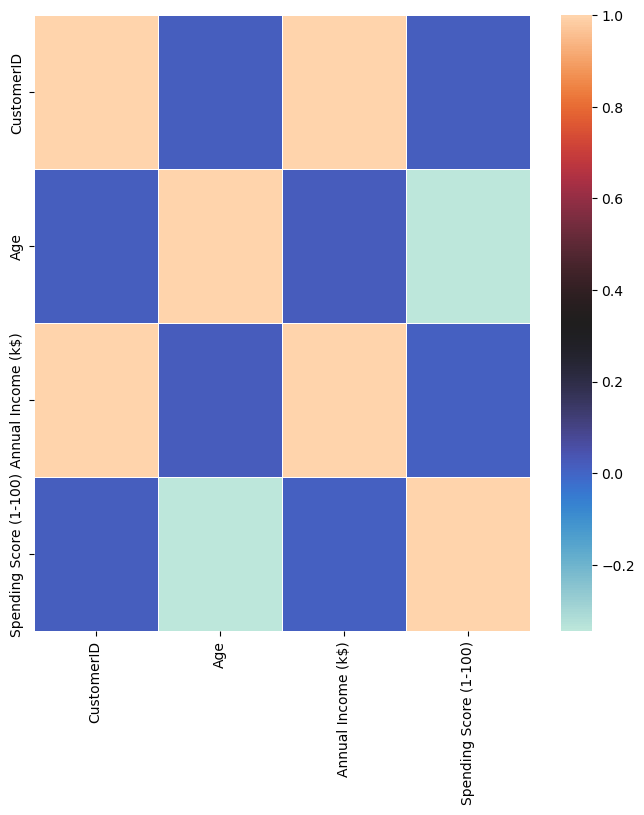

In [17]:
# Select only numeric columns
numeric_df = customer_df.select_dtypes(include=['number'])

# Compute the correlation matrix on the numeric columns only
customer_corr = numeric_df.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(customer_corr, cmap='icefire', linewidths=0.5)

plt.show()

In [18]:
customer_df.drop(columns='CustomerID',axis=1,inplace=True)

In [19]:
# Generate one-hot dummy columns
customer_df = pd.get_dummies(customer_df).reset_index(drop=True)

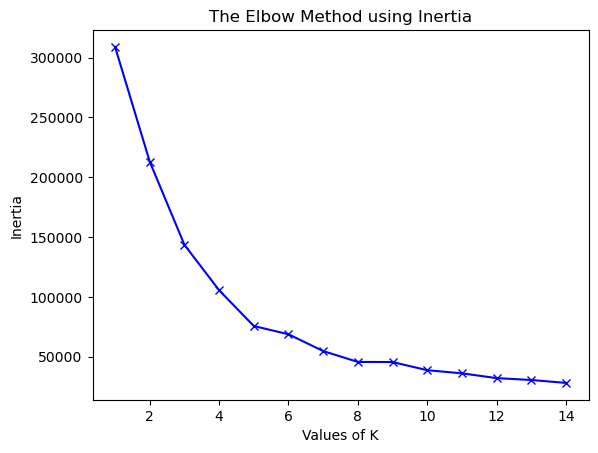

In [20]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(customer_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [21]:
# apply kmeans algorithm
kmeans_model=KMeans(5)
kmeans_clusters = kmeans_model.fit_predict(customer_df)

In [22]:
GaussianMixture_model = GaussianMixture(n_components=5)
gmm_clusters = GaussianMixture_model.fit_predict(customer_df)

In [23]:
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(customer_df)

In [24]:
model_dbscan = DBSCAN(eps=3, min_samples=17)
dbscan_clusters = model_dbscan.fit_predict(customer_df)

In [25]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(customer_df,' : KMeans',kmeans_clusters)
silhouette_method(customer_df,' : Agglomerative',agglomerative_clusters)
silhouette_method(customer_df,' : GaussianMixture',gmm_clusters)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.444603880731791
Clustering   : Agglomerative  : silhouette score :  0.43976347350045475
Clustering   : GaussianMixture  : silhouette score :  -0.0038880629428323776


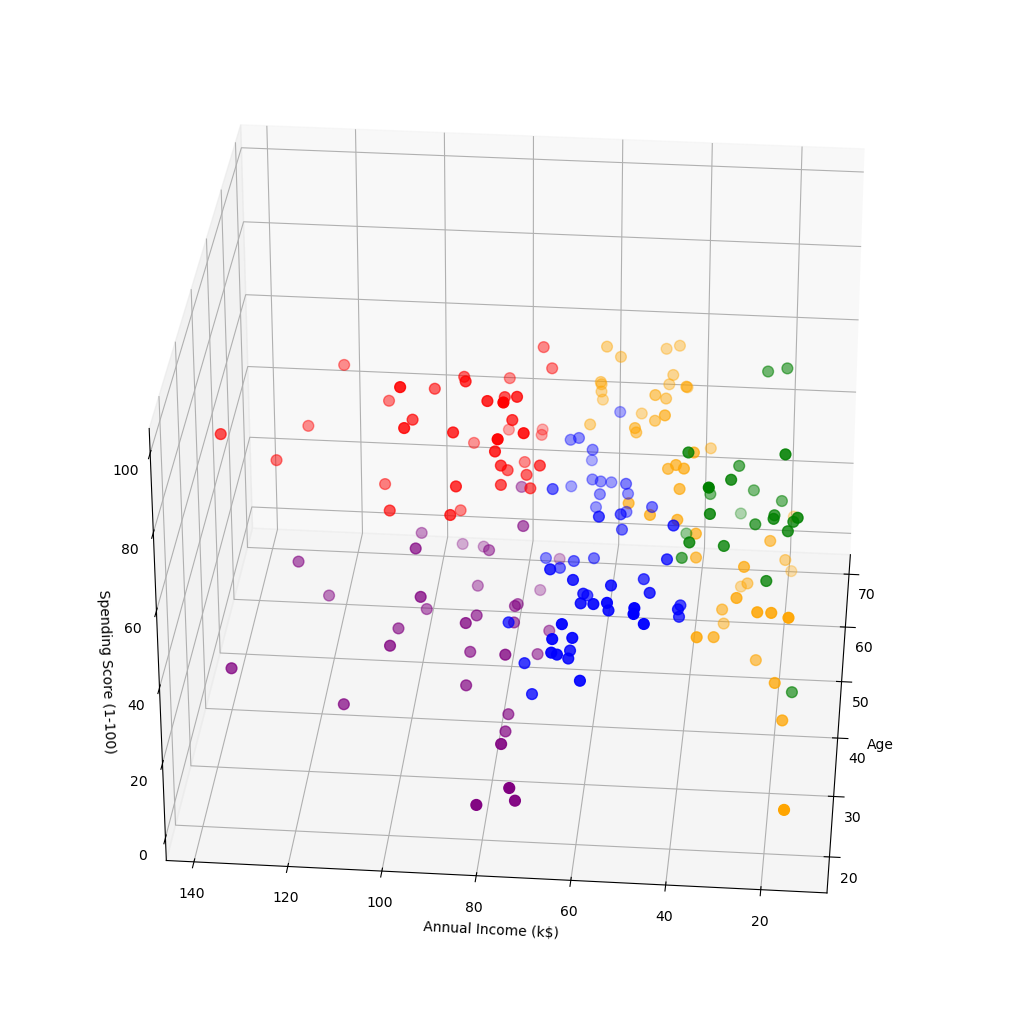

In [26]:
customer_df["label"] = kmeans_clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_df.Age[customer_df.label == 0], customer_df["Annual Income (k$)"][customer_df.label == 0], customer_df["Spending Score (1-100)"][customer_df.label == 0], c='blue', s=60)
ax.scatter(customer_df.Age[customer_df.label == 1], customer_df["Annual Income (k$)"][customer_df.label == 1], customer_df["Spending Score (1-100)"][customer_df.label == 1], c='red', s=60)
ax.scatter(customer_df.Age[customer_df.label == 2], customer_df["Annual Income (k$)"][customer_df.label == 2], customer_df["Spending Score (1-100)"][customer_df.label == 2], c='green', s=60)
ax.scatter(customer_df.Age[customer_df.label == 3], customer_df["Annual Income (k$)"][customer_df.label == 3], customer_df["Spending Score (1-100)"][customer_df.label == 3], c='orange', s=60)
ax.scatter(customer_df.Age[customer_df.label == 4], customer_df["Annual Income (k$)"][customer_df.label == 4], customer_df["Spending Score (1-100)"][customer_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()